# Import Libraries and Load Data

In [99]:
# data processing

import pandas as pd 
import numpy as np

# data visualization

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [100]:
# read csv file
df=pd.read_csv("heart_disease_uci.csv")

In [101]:
# to get data head
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [102]:
# to get data tail
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# 1. General Information

In [104]:
# to find no of rows and columns of data
rows, columns = df.shape
print(f'The dataset contains {rows} rows and {columns} columns.')

The dataset contains 920 rows and 16 columns.


In [105]:
# finding missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


# 2. Target Variable Analysis

In [106]:
#distribution of the target variable (presence of heart disease: 0 or 1)
print("Target Variable Distribution:\n", df['num'].value_counts())

Target Variable Distribution:
 0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64


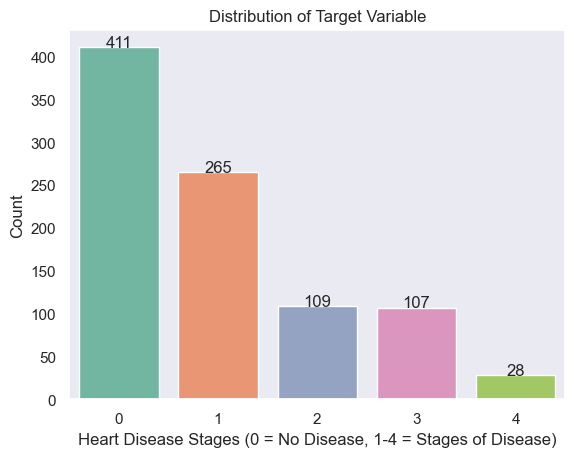

In [107]:
# to find how many patients have no heart disease(0) and how many have stages of disease(1-4)
sns.set_theme(style="dark")
ax = sns.countplot(data=df, x='num', palette='Set2')
# Add data labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), 
            ha='center')
plt.title('Distribution of Target Variable')
plt.xlabel('Heart Disease Stages (0 = No Disease, 1-4 = Stages of Disease)')
plt.ylabel('Count')
plt.show()

# 3. Demographic Insights

In [108]:
# to get age range of patients
print("Age Range:", df['age'].min(), "-", df['age'].max())

Age Range: 28 - 77


Gender Distribution:
 Male      726
Female    194
Name: sex, dtype: int64


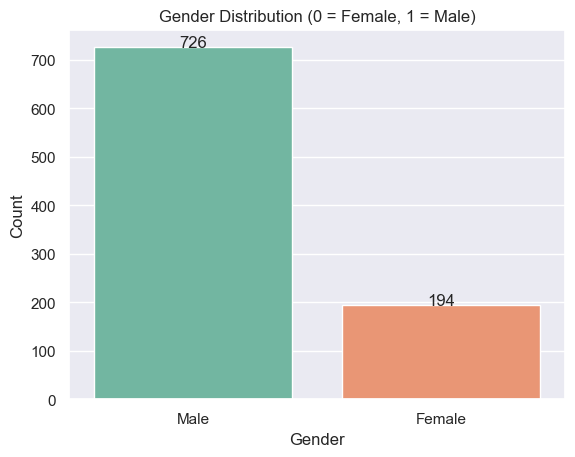

In [109]:
# to get gender distribution of the patients
print("Gender Distribution:\n", df['sex'].value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x='sex', palette='Set2')
# Add data labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), 
            ha='center')
plt.title('Gender Distribution')
plt.title('Gender Distribution (0 = Female, 1 = Male)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 4. Health Metrics

In [110]:
# Evaluating the average and median values of:
# Resting blood pressure (trestbps)
# Serum cholesterol (chol)
# Maximum heart rate (thalach)
print("Average Resting Blood Pressure:", df['trestbps'].mean())
print("Median Resting Blood Pressure:", df['trestbps'].median())
print("Average Serum Cholesterol:", df['chol'].mean())
print("Median Serum Cholesterol:", df['chol'].median())
print("Average Maximum Heart Rate:", df['thalch'].mean())
print("Median Maximum Heart Rate:", df['thalch'].median())

Average Resting Blood Pressure: 132.13240418118468
Median Resting Blood Pressure: 130.0
Average Serum Cholesterol: 199.13033707865168
Median Serum Cholesterol: 223.0
Average Maximum Heart Rate: 137.5456647398844
Median Maximum Heart Rate: 140.0


# 5. Categorical Features

In [111]:
# finding how many patients have Exercise-Induced Angina (exang)
print("Exercise-Induced Angina Count:\n", df['exang'].value_counts())

Exercise-Induced Angina Count:
 False    528
True     337
Name: exang, dtype: int64


Chest Pain Types Count:
 asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64


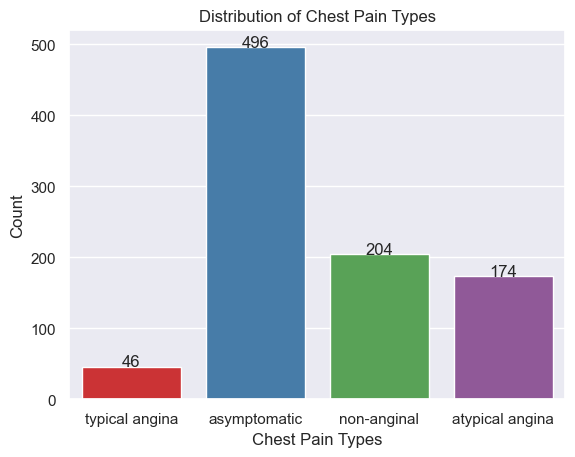

In [112]:
# count of different chest pain types(cp)
print("Chest Pain Types Count:\n", df['cp'].value_counts())
ax=sns.countplot(data=df, x='cp', palette='Set1')
sns.set_theme(style="darkgrid")
# Add data labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), 
            ha='center')
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Types')
plt.ylabel('Count')
plt.show()

# 6. Visual Analysis

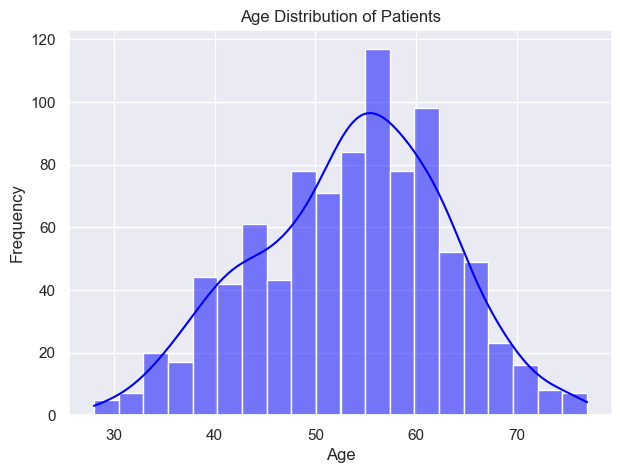

In [113]:
# Plotting the age distribution of the patients 
plt.figure(figsize=(7, 5))
sns.histplot(df['age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

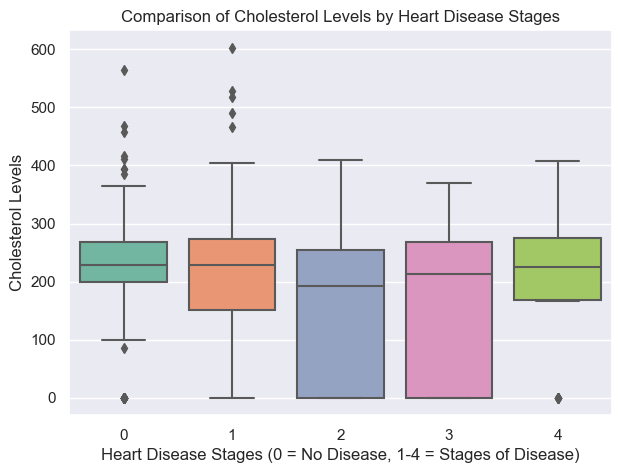

In [87]:
# Comparing the average cholesterol levels between patients of no disease and stages of diseases
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='num', y='chol', palette='Set2')
plt.title('Comparison of Cholesterol Levels by Heart Disease Stages')
plt.xlabel('Heart Disease Stages (0 = No Disease, 1-4 = Stages of Disease)')
plt.ylabel('Cholesterol Levels')
plt.show()

# 7. Outliers

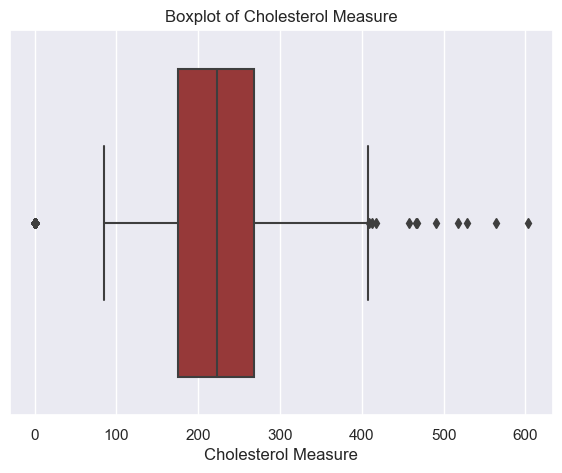

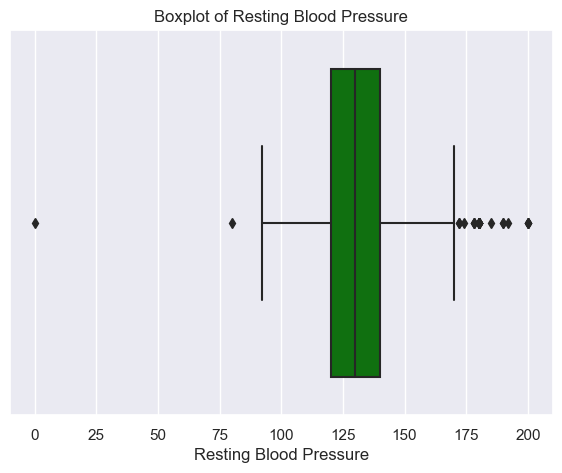

In [129]:
# finding outliers in cholesterol (chol) or resting blood pressure (trestbps)
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['chol'], color='brown')
plt.title('Boxplot of Cholesterol Measure')
plt.xlabel('Cholesterol Measure')
plt.show()

plt.figure(figsize=(7, 5))
sns.boxplot(x=df['trestbps'], color='green')
plt.title('Boxplot of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure')
plt.show()

C:\Users\AAC\AppData\Local\Temp\ipykernel_15584\2921578657.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.12, 'Feature Corelation using Heatmap ')

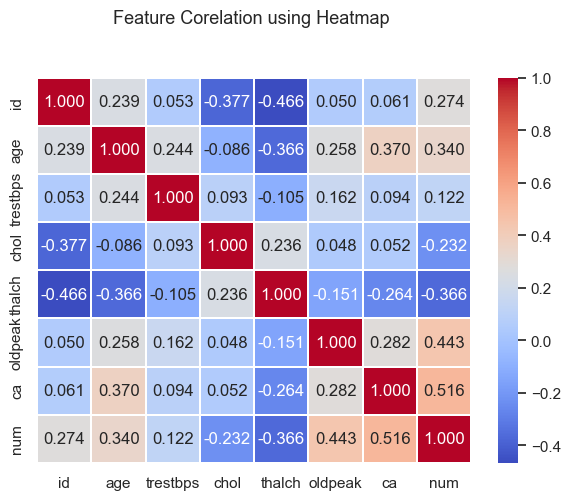

In [138]:
# Feature Corelation using Heatmap
corr = df.corr()
plt.figure(figsize = (7,5))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,fmt='.3f',linewidths=0.2,cmap='coolwarm')
plt.title('Feature Corelation using Heatmap ', y = 1.12, size=13, loc="center")

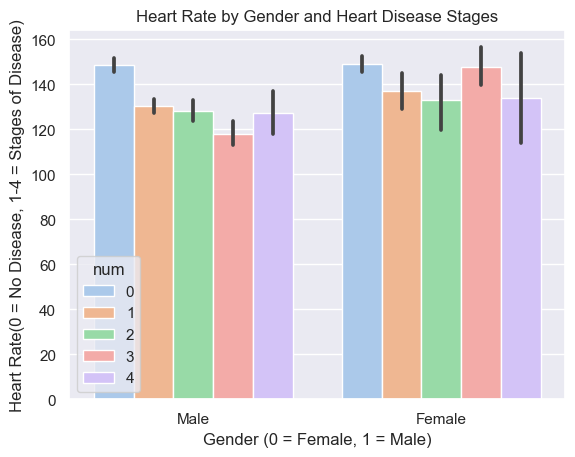

In [131]:
# Heart Rate by Gender and Heart Disease Stages
sns.barplot(data=df, x='sex', y='thalch', hue='num', palette='pastel')
plt.title('Heart Rate by Gender and Heart Disease Stages')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Heart Rate(0 = No Disease, 1-4 = Stages of Disease)')
plt.show()

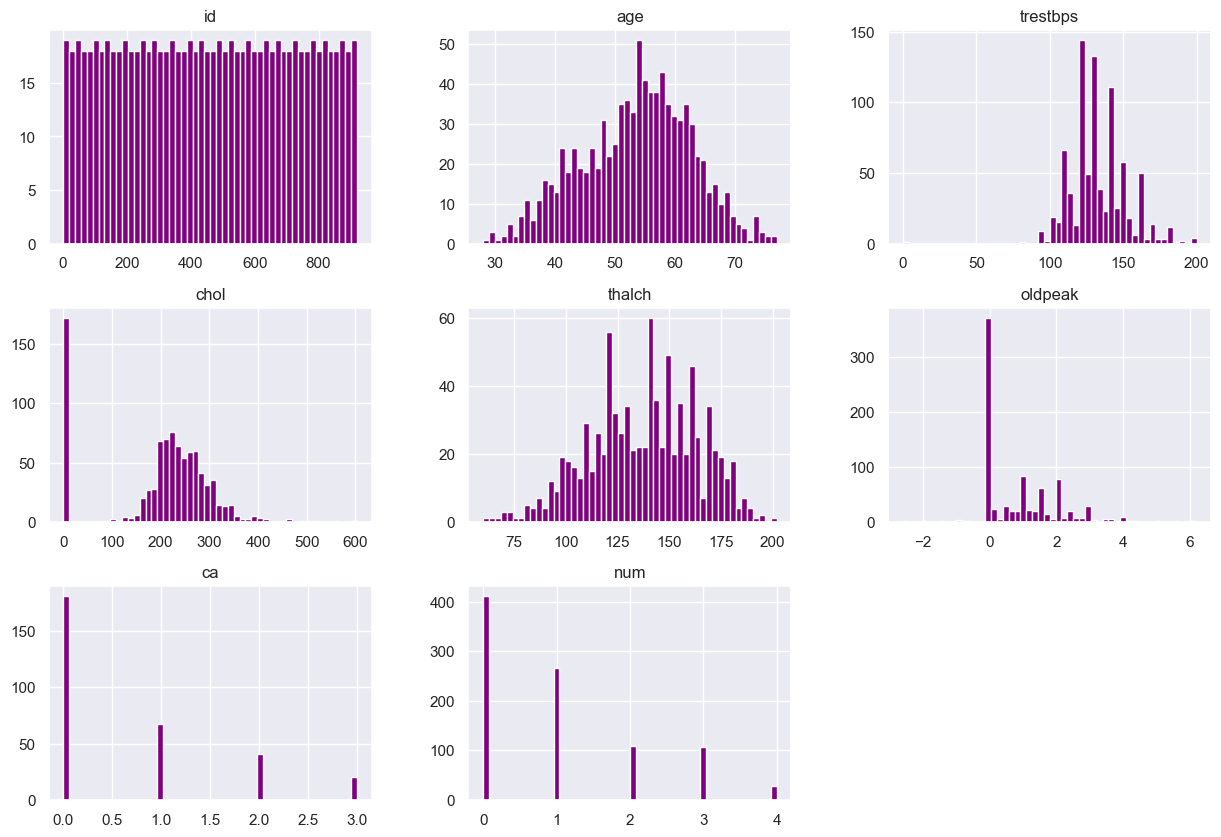

In [135]:
df.hist(bins=50, figsize=(15, 10),color='purple')
plt.show()